# 關鍵字搜尋

## 處理目標：
1. 在欄位[貸後控管事項]後方插入一個欄位[SN]
2. 就欄位[貸後控管事項]符合關鍵字者，列出查詢結果，最後將結果另存為一個sheet[貸後控管事項關鍵字蒐尋結果]

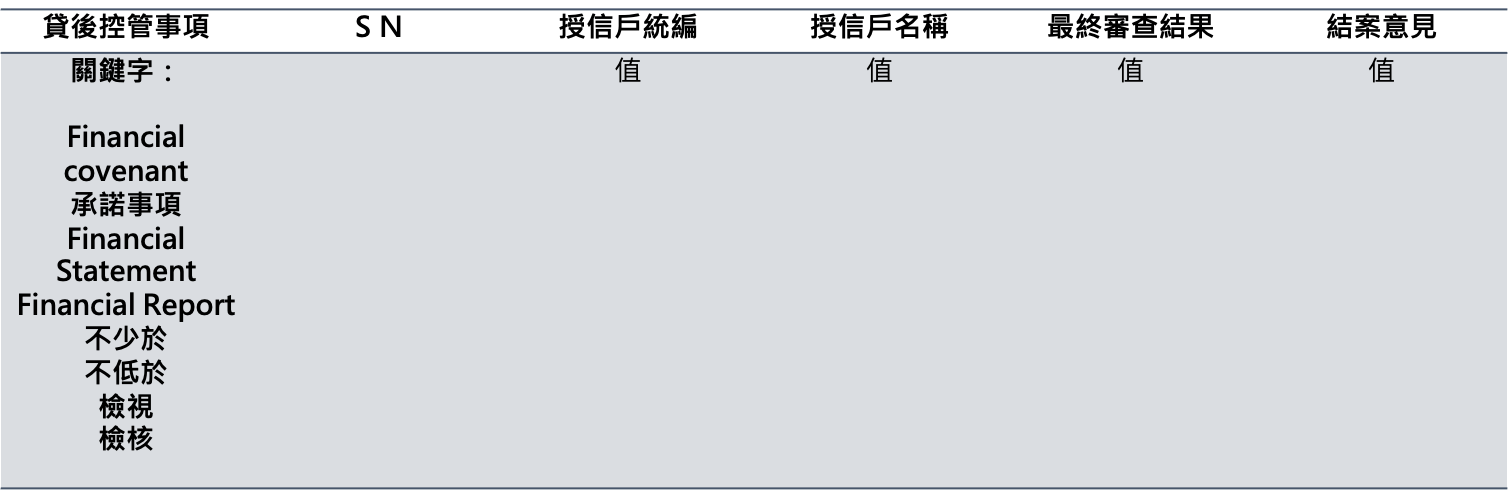


## 資料整理：

為了方便關鍵字搜尋，進行以下兩步驟處理：
1. 將句字中英文字母全部換成小寫
2. 將句字中簡體字換成繁體字

In [1]:
import pandas as pd

In [2]:
import os
os.getcwd()
data_dir = os.getcwd()
df=pd.read_excel(os.getcwd()+"/case data/案例二：關鍵字蒐尋的工作表.xlsx")

In [3]:
df=df[['貸後控管事項','授信戶統編','授信戶名稱','最終審查結果','結案意見']]

In [4]:
df

,貸後控管事項,授信戶統編,授信戶名稱,最終審查結果,結案意見
0,每季檢視：xxxxxxxxxxxxxxxxxxxx,NaN,A4,不符合(洪慧萍),無
1,每3個月'檢視銷xxxxxxxxxxxxxxxxx,NaN,A20,不符合(陳力政),無
2,每季檢視東方xxxxxxxxxxxxxx,NaN,A48,不符合(洪慧萍),暫不處理
3,1.每月xxxxxxxxxxxxxx\nsssssssss，若檢視不符，須通知客戶於10個工...,NaN,A63,不符合(張樂兒),以變簽處理
4,"每月""檢視""投資xxxxxxxxxxxxxxxxxxxxxxxxxxx",NaN,A64,不符合(陳力政),暫不處理
5,每三個月檢核：(難難難難難,NaN,A67,不符合(林怡秀),以變簽處理
6,企業團年往來實績未難難難難難季檢核平均存難難難難難,NaN,A69,不符合(余姿潔),無
7,企業團在我行xxxxxxx不少於xxxxxxxxxxxxxxxxxxx,NaN,A70,不符合(洪慧萍),暫不處理
8,Corporate Guarantor shall provide the latest i...,NaN,A72,不符合(陳力政),暫不處理
9,"借款人經貸款行x""不少於""xxxxxxxxxxxxxxxxxxxxxxx",A00005,A82,不符合(陳力政),暫不處理


In [5]:
df.insert(1, column="SN",value=None) #新增SN欄

In [6]:
df.head()

,貸後控管事項,SN,授信戶統編,授信戶名稱,最終審查結果,結案意見
0,每季檢視：xxxxxxxxxxxxxxxxxxxx,None,NaN,A4,不符合(洪慧萍),無
1,每3個月'檢視銷xxxxxxxxxxxxxxxxx,None,NaN,A20,不符合(陳力政),無
2,每季檢視東方xxxxxxxxxxxxxx,None,NaN,A48,不符合(洪慧萍),暫不處理
3,1.每月xxxxxxxxxxxxxx\nsssssssss，若檢視不符，須通知客戶於10個工...,None,NaN,A63,不符合(張樂兒),以變簽處理
4,"每月""檢視""投資xxxxxxxxxxxxxxxxxxxxxxxxxxx",None,NaN,A64,不符合(陳力政),暫不處理


### 1. 換成小寫

In [7]:
df['貸後控管事項1']=df['貸後控管事項'].str.lower() 
df[['貸後控管事項1']]

,貸後控管事項1
0,每季檢視：xxxxxxxxxxxxxxxxxxxx
1,每3個月'檢視銷xxxxxxxxxxxxxxxxx
2,每季檢視東方xxxxxxxxxxxxxx
3,1.每月xxxxxxxxxxxxxx\nsssssssss，若檢視不符，須通知客戶於10個工...
4,"每月""檢視""投資xxxxxxxxxxxxxxxxxxxxxxxxxxx"
5,每三個月檢核：(難難難難難
6,企業團年往來實績未難難難難難季檢核平均存難難難難難
7,企業團在我行xxxxxxx不少於xxxxxxxxxxxxxxxxxxx
8,corporate guarantor shall provide the latest i...
9,"借款人經貸款行x""不少於""xxxxxxxxxxxxxxxxxxxxxxx"


### 2. 換成繁體字

In [8]:
!pip install opencc-python-reimplemented

In [9]:
from opencc import OpenCC
cc = OpenCC('s2t')

In [10]:
list1=df['貸後控管事項1'].to_list()

In [11]:
for i in range(0,df.shape[0]):
    s=list1[i]
    cs=cc.convert(s)
    df.loc[i,'貸後控管事項1']=cs

In [12]:
df[['貸後控管事項1']]

,貸後控管事項1
0,每季檢視：xxxxxxxxxxxxxxxxxxxx
1,每3個月'檢視銷xxxxxxxxxxxxxxxxx
2,每季檢視東方xxxxxxxxxxxxxx
3,1.每月xxxxxxxxxxxxxx\nsssssssss，若檢視不符，須通知客戶於10個工...
4,"每月""檢視""投資xxxxxxxxxxxxxxxxxxxxxxxxxxx"
5,每三個月檢核：(難難難難難
6,企業團年往來實績未難難難難難季檢核平均存難難難難難
7,企業團在我行xxxxxxx不少於xxxxxxxxxxxxxxxxxxx
8,corporate guarantor shall provide the latest i...
9,"借款人經貸款行x""不少於""xxxxxxxxxxxxxxxxxxxxxxx"


## 找出關鍵字：

In [13]:
#建立關鍵字list
SN_list=['Financial covenant','承諾事項','Financial Statement'
         ,'Financial Report','不少於','不低於','檢視','檢核']
SN_list

['Financial covenant',
 '承諾事項',
 'Financial Statement',
 'Financial Report',
 '不少於',
 '不低於',
 '檢視',
 '檢核']

In [14]:
#將英文字母都換成小寫
for x in range(0, len(SN_list)):
    SN_list[x]=SN_list[x].lower()
SN_list

['financial covenant',
 '承諾事項',
 'financial statement',
 'financial report',
 '不少於',
 '不低於',
 '檢視',
 '檢核']

In [15]:
list1=df['貸後控管事項1'].to_list()

In [16]:
for i, s in enumerate(list1):
    list3=[]
    for sn in SN_list:
        pos = s.find(sn)
        if pos >= 0:# 有找到keyword
            list3.append(sn)
    str5=",".join(list3)
    df['SN'].loc[i]=str5

In [17]:
df=df.drop('貸後控管事項1', axis = 1)
df

,貸後控管事項,SN,授信戶統編,授信戶名稱,最終審查結果,結案意見
0,每季檢視：xxxxxxxxxxxxxxxxxxxx,檢視,NaN,A4,不符合(洪慧萍),無
1,每3個月'檢視銷xxxxxxxxxxxxxxxxx,檢視,NaN,A20,不符合(陳力政),無
2,每季檢視東方xxxxxxxxxxxxxx,檢視,NaN,A48,不符合(洪慧萍),暫不處理
3,1.每月xxxxxxxxxxxxxx\nsssssssss，若檢視不符，須通知客戶於10個工...,檢視,NaN,A63,不符合(張樂兒),以變簽處理
4,"每月""檢視""投資xxxxxxxxxxxxxxxxxxxxxxxxxxx",檢視,NaN,A64,不符合(陳力政),暫不處理
5,每三個月檢核：(難難難難難,檢核,NaN,A67,不符合(林怡秀),以變簽處理
6,企業團年往來實績未難難難難難季檢核平均存難難難難難,檢核,NaN,A69,不符合(余姿潔),無
7,企業團在我行xxxxxxx不少於xxxxxxxxxxxxxxxxxxx,不少於,NaN,A70,不符合(洪慧萍),暫不處理
8,Corporate Guarantor shall provide the latest i...,financial report,NaN,A72,不符合(陳力政),暫不處理
9,"借款人經貸款行x""不少於""xxxxxxxxxxxxxxxxxxxxxxx",不少於,A00005,A82,不符合(陳力政),暫不處理


In [18]:
df.to_excel(os.getcwd()+"/case output/貸後控管事項關鍵字蒐尋結果.xlsx", index=False)